# Credit Score Prediction

## Importing the required Packages

In [1059]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [1060]:
import warnings

warnings.filterwarnings(action='ignore')

## Reading the data

In [1061]:
df=pd.read_csv("dataset.csv")
df.head()


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529544,High_spent_Small_value_payments,312.4940887,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.2802216,Low_spent_Large_value_payments,284.6291625,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.69952126,Low_spent_Medium_value_payments,331.2098629,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580744,Low_spent_Small_value_payments,223.4513097,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.42015309,High_spent_Medium_value_payments,341.489231,Good


## Exploratory data analysis (EDA)

In [1062]:
df.shape

(100000, 28)

In [1063]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [1064]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Monthly_Inhand_Salary,84998.0,4194.170850,3183.686167,303.645417,1625.568229,3093.745000,5957.448333,15204.63333
Num_Bank_Accounts,100000.0,17.091280,117.404834,-1.000000,3.000000,6.000000,7.000000,1798.00000
Num_Credit_Card,100000.0,22.474430,129.057410,0.000000,4.000000,5.000000,7.000000,1499.00000
Interest_Rate,100000.0,72.466040,466.422621,1.000000,8.000000,13.000000,20.000000,5797.00000
Delay_from_due_date,100000.0,21.068780,14.860104,-5.000000,10.000000,18.000000,28.000000,67.00000
Num_Credit_Inquiries,98035.0,27.754251,193.177339,0.000000,3.000000,6.000000,9.000000,2597.00000
Credit_Utilization_Ratio,100000.0,32.285173,5.116875,20.000000,28.052567,32.305784,36.496663,50.00000
Total_EMI_per_month,100000.0,1403.118217,8306.041270,0.000000,30.306660,69.249473,161.224249,82331.00000


In [1065]:
df.drop_duplicates()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529544,High_spent_Small_value_payments,312.4940887,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.2802216,Low_spent_Large_value_payments,284.6291625,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.69952126,Low_spent_Medium_value_payments,331.2098629,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580744,Low_spent_Small_value_payments,223.4513097,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.42015309,High_spent_Medium_value_payments,341.489231,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0x25fe9,CUS_0x942c,April,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.97133256,High_spent_Large_value_payments,479.866228,Poor
99996,0x25fea,CUS_0x942c,May,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.18595029,High_spent_Medium_value_payments,496.65161,Poor
99997,0x25feb,CUS_0x942c,June,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.02847745,High_spent_Large_value_payments,516.809083,Poor
99998,0x25fec,CUS_0x942c,July,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,33.638208,31 Years and 9 Months,No,35.104023,251.6725822,Low_spent_Large_value_payments,319.164979,Standard


### Selecting the best columns

In [1066]:
df_new=df[['Age','Credit_Utilization_Ratio','Credit_History_Age','Payment_Behaviour','Outstanding_Debt','Num_of_Delayed_Payment','Delay_from_due_date','Annual_Income','Credit_Mix','Payment_of_Min_Amount','Credit_Score']]
df_new

,Age,Credit_Utilization_Ratio,Credit_History_Age,Payment_Behaviour,Outstanding_Debt,Num_of_Delayed_Payment,Delay_from_due_date,Annual_Income,Credit_Mix,Payment_of_Min_Amount,Credit_Score
0,23,26.822620,22 Years and 1 Months,High_spent_Small_value_payments,809.98,7,3,19114.12,_,No,Good
1,23,31.944960,NaN,Low_spent_Large_value_payments,809.98,NaN,-1,19114.12,Good,No,Good
2,-500,28.609352,22 Years and 3 Months,Low_spent_Medium_value_payments,809.98,7,3,19114.12,Good,No,Good
3,23,31.377862,22 Years and 4 Months,Low_spent_Small_value_payments,809.98,4,5,19114.12,Good,No,Good
4,23,24.797347,22 Years and 5 Months,High_spent_Medium_value_payments,809.98,NaN,6,19114.12,Good,No,Good
...,...,...,...,...,...,...,...,...,...,...,...
99995,25,34.663572,31 Years and 6 Months,High_spent_Large_value_payments,502.38,7,23,39628.99,_,No,Poor
99996,25,40.565631,31 Years and 7 Months,High_spent_Medium_value_payments,502.38,7,18,39628.99,_,No,Poor
99997,25,41.255522,31 Years and 8 Months,High_spent_Large_value_payments,502.38,6,27,39628.99,Good,No,Poor
99998,25,33.638208,31 Years and 9 Months,Low_spent_Large_value_payments,502.38,NaN,20,39628.99,Good,No,Standard


In [1067]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Age                       100000 non-null  object 
 1   Credit_Utilization_Ratio  100000 non-null  float64
 2   Credit_History_Age        90970 non-null   object 
 3   Payment_Behaviour         100000 non-null  object 
 4   Outstanding_Debt          100000 non-null  object 
 5   Num_of_Delayed_Payment    92998 non-null   object 
 6   Delay_from_due_date       100000 non-null  int64  
 7   Annual_Income             100000 non-null  object 
 8   Credit_Mix                100000 non-null  object 
 9   Payment_of_Min_Amount     100000 non-null  object 
 10  Credit_Score              100000 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 8.4+ MB


### Age column
- Invalid values: Examples include -500, 28_, 4808_, which are not valid ages.
- Non-numeric values: Underscores (_) appear in some entries.


In [1068]:
# Clean the Age column
df_new['Age']=df_new['Age'].str.replace('_','',regex=False)

df_new['Age'] = pd.to_numeric(df_new['Age'], errors='coerce')    # Convert to numeric

# Replace unrealistic values with NaN (e.g., negative or overly high values)
df_new.loc[(df_new['Age'] < 0) | (df_new['Age'] > 100), 'Age'] = None

cleaned_age_unique_values = df_new['Age'].unique()
cleaned_age_unique_values


array([ 23.,  nan,  28.,  34.,  54.,  55.,  21.,  31.,  33.,  30.,  24.,
        44.,  45.,  40.,  41.,  32.,  35.,  36.,  39.,  37.,  20.,  46.,
        26.,  42.,  19.,  48.,  38.,  43.,  22.,  16.,  18.,  15.,  27.,
        25.,  14.,  17.,  47.,  53.,  56.,  29.,  49.,  51.,  50.,  52.,
        99., 100.,  95.])

In [1069]:
df_new['Age'].isna().sum()

2776

In [1070]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Age                       97224 non-null   float64
 1   Credit_Utilization_Ratio  100000 non-null  float64
 2   Credit_History_Age        90970 non-null   object 
 3   Payment_Behaviour         100000 non-null  object 
 4   Outstanding_Debt          100000 non-null  object 
 5   Num_of_Delayed_Payment    92998 non-null   object 
 6   Delay_from_due_date       100000 non-null  int64  
 7   Annual_Income             100000 non-null  object 
 8   Credit_Mix                100000 non-null  object 
 9   Payment_of_Min_Amount     100000 non-null  object 
 10  Credit_Score              100000 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 8.4+ MB


In [1071]:
df_new[['Outstanding_Debt', 'Annual_Income']].isnull().sum()

Outstanding_Debt    0
Annual_Income       0
dtype: int64

### Credit_utilization_Ratio column

In [1072]:
df_new['Credit_Utilization_Ratio'].head()


0    26.822620
1    31.944960
2    28.609352
3    31.377862
4    24.797347
Name: Credit_Utilization_Ratio, dtype: float64

In [1073]:
df_new['Credit_Utilization_Ratio'].isna().sum()

0

### Credit history column

In [1074]:
# Convert 'Credit_History_Age' to numerical by extracting years and months, then filling missing values
# Extract years and months from 'Credit_History_Age' and convert to a single numerical value in months
df_new['Credit_History_Age_Months'] = df_new['Credit_History_Age'].str.extract(r'(\d+)').astype(float) * 12 + \
                                      df_new['Credit_History_Age'].str.extract(r'(\d+)').astype(float)

In [1075]:
# Drop the original 'Credit_History_Age' column after extraction
df_new.drop(columns=['Credit_History_Age'], inplace=True)

In [1076]:
df_new['Credit_History_Age_Months'].head()

0    286.0
1      NaN
2    286.0
3    286.0
4    286.0
Name: Credit_History_Age_Months, dtype: float64

In [1077]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Age                        97224 non-null   float64
 1   Credit_Utilization_Ratio   100000 non-null  float64
 2   Payment_Behaviour          100000 non-null  object 
 3   Outstanding_Debt           100000 non-null  object 
 4   Num_of_Delayed_Payment     92998 non-null   object 
 5   Delay_from_due_date        100000 non-null  int64  
 6   Annual_Income              100000 non-null  object 
 7   Credit_Mix                 100000 non-null  object 
 8   Payment_of_Min_Amount      100000 non-null  object 
 9   Credit_Score               100000 non-null  object 
 10  Credit_History_Age_Months  90970 non-null   float64
dtypes: float64(3), int64(1), object(7)
memory usage: 8.4+ MB


### droping the na values

In [1078]:
df_new=df_new.dropna(subset=['Age'])
df_new=df_new.dropna(subset=['Credit_History_Age_Months'])
df_new=df_new.dropna(subset=['Num_of_Delayed_Payment'])

In [1079]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 82239 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        82239 non-null  float64
 1   Credit_Utilization_Ratio   82239 non-null  float64
 2   Payment_Behaviour          82239 non-null  object 
 3   Outstanding_Debt           82239 non-null  object 
 4   Num_of_Delayed_Payment     82239 non-null  object 
 5   Delay_from_due_date        82239 non-null  int64  
 6   Annual_Income              82239 non-null  object 
 7   Credit_Mix                 82239 non-null  object 
 8   Payment_of_Min_Amount      82239 non-null  object 
 9   Credit_Score               82239 non-null  object 
 10  Credit_History_Age_Months  82239 non-null  float64
dtypes: float64(3), int64(1), object(7)
memory usage: 7.5+ MB


In [1080]:
df_new['Credit_History_Age_Months'].isna().sum()

0

 ### Payment_Behaviour, Outstanding_Debt, Num_of_Delayed_Payment columns

In [1081]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df_new['Payment_Behaviour']=encoder.fit_transform(df_new['Payment_Behaviour']).astype('float')
df_new['Outstanding_Debt']=encoder.fit_transform(df_new['Outstanding_Debt']).astype('float')
df_new['Num_of_Delayed_Payment']=encoder.fit_transform(df_new['Num_of_Delayed_Payment']).astype('float')


In [1082]:
df_new['Payment_Behaviour'].isna().sum()

0

In [1083]:
df_new['Outstanding_Debt'].isna().sum()

0

In [1084]:
df_new['Num_of_Delayed_Payment'].isna().sum()

0

In [1085]:

df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 82239 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        82239 non-null  float64
 1   Credit_Utilization_Ratio   82239 non-null  float64
 2   Payment_Behaviour          82239 non-null  float64
 3   Outstanding_Debt           82239 non-null  float64
 4   Num_of_Delayed_Payment     82239 non-null  float64
 5   Delay_from_due_date        82239 non-null  int64  
 6   Annual_Income              82239 non-null  object 
 7   Credit_Mix                 82239 non-null  object 
 8   Payment_of_Min_Amount      82239 non-null  object 
 9   Credit_Score               82239 non-null  object 
 10  Credit_History_Age_Months  82239 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 7.5+ MB


## Delay_from_due_date column

In [1086]:
df_new['Delay_from_due_date'].value_counts().sort_index()

Delay_from_due_date
-5      26
-4      51
-3      95
-2     142
-1     172
      ... 
 63     60
 64     50
 65     44
 66     26
 67     19
Name: count, Length: 73, dtype: int64

In [1087]:
df_new['Delay_from_due_date'].isna().sum()

0

## Annual Income column

In [1088]:
df_new['Annual_Income'].isna().sum()

0

In [1089]:
underScore_entries = df_new[df_new['Annual_Income'].str.contains('_')]
underScore_entries['Annual_Income'].count()

5735

In [1090]:
# df['Annual_Income']=df['Annual_Income'].str.replace('_','').astype(float)

df_new['Annual_Income'] = df_new['Annual_Income'].str.replace('_', '')

# If 'Annual_Income' is supposed to be numeric, convert it to float
df_new['Annual_Income'] = pd.to_numeric(df_new['Annual_Income'], errors='coerce')


In [1091]:

# Ensure the 'Annual_Income' column is of string type
df_new['Annual_Income'] = df_new['Annual_Income'].astype(str)

# Find entries with underscores in the 'Annual_Income' column
underScore_entries = df_new[df_new['Annual_Income'].str.contains('_')]

# Count the number of such entries
underscore_count = underScore_entries['Annual_Income'].count()
print(underscore_count)

0


In [1092]:
df_new['Annual_Income'].value_counts()

Annual_Income
40341.16      16
17816.75      15
20867.67      14
95596.35      14
9141.63       14
              ..
1200455.0      1
23229157.0     1
20703498.0     1
2546333.0      1
16055942.0     1
Name: count, Length: 13409, dtype: int64

## Credit_Mix column

In [1093]:
df_new['Credit_Mix'].value_counts()

Credit_Mix
Standard    30054
Good        19968
_           16626
Bad         15591
Name: count, dtype: int64

In [1094]:
df_new['Credit_Mix'].count()

82239

In [1095]:
df_new['Credit_Mix'].isna().sum()

0

In [1096]:
df_new['Credit_Mix'] = df_new['Credit_Mix'].replace("_",np.nan)

In [1097]:

df_new['Credit_Mix'].count()

65613

In [1098]:
from sklearn.preprocessing import LabelEncoder

credit_encoder = LabelEncoder()
df_new['Credit_Mix'] = credit_encoder.fit_transform(df_new['Credit_Mix'])

In [1099]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 82239 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        82239 non-null  float64
 1   Credit_Utilization_Ratio   82239 non-null  float64
 2   Payment_Behaviour          82239 non-null  float64
 3   Outstanding_Debt           82239 non-null  float64
 4   Num_of_Delayed_Payment     82239 non-null  float64
 5   Delay_from_due_date        82239 non-null  int64  
 6   Annual_Income              82239 non-null  object 
 7   Credit_Mix                 82239 non-null  int32  
 8   Payment_of_Min_Amount      82239 non-null  object 
 9   Credit_Score               82239 non-null  object 
 10  Credit_History_Age_Months  82239 non-null  float64
dtypes: float64(6), int32(1), int64(1), object(3)
memory usage: 7.2+ MB


## Payment_of_Min_Amount column 

In [1100]:
df_new['Payment_of_Min_Amount'].value_counts()

Payment_of_Min_Amount
Yes    43087
No     29325
NM      9827
Name: count, dtype: int64

In [1101]:
df_new['Payment_of_Min_Amount'].isna().sum()

0

### One hot encoding

In [1102]:
df_new = pd.get_dummies(df_new, columns=['Payment_of_Min_Amount'], prefix='Payment_of_Min_Amount')

In [1103]:
df_new['Payment_of_Min_Amount_NM'] = encoder.fit_transform(df_new['Payment_of_Min_Amount_NM'])
df_new['Payment_of_Min_Amount_No'] = encoder.fit_transform(df_new['Payment_of_Min_Amount_No'])
df_new['Payment_of_Min_Amount_Yes'] = encoder.fit_transform(df_new['Payment_of_Min_Amount_Yes'])

In [1104]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 82239 entries, 0 to 99999
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        82239 non-null  float64
 1   Credit_Utilization_Ratio   82239 non-null  float64
 2   Payment_Behaviour          82239 non-null  float64
 3   Outstanding_Debt           82239 non-null  float64
 4   Num_of_Delayed_Payment     82239 non-null  float64
 5   Delay_from_due_date        82239 non-null  int64  
 6   Annual_Income              82239 non-null  object 
 7   Credit_Mix                 82239 non-null  int32  
 8   Credit_Score               82239 non-null  object 
 9   Credit_History_Age_Months  82239 non-null  float64
 10  Payment_of_Min_Amount_NM   82239 non-null  int64  
 11  Payment_of_Min_Amount_No   82239 non-null  int64  
 12  Payment_of_Min_Amount_Yes  82239 non-null  int64  
dtypes: float64(6), int32(1), int64(4), object(2)
memory

## Credit_Score column

In [1105]:
df_new['Credit_Score'].value_counts()

Credit_Score
Standard    43720
Poor        23903
Good        14616
Name: count, dtype: int64

In [1106]:
# Check unique values in Credit_Score column
credit_score_unique_values = df_new['Credit_Score'].unique()
print("Unique values in Credit_Score column:", credit_score_unique_values)

Unique values in Credit_Score column: ['Good' 'Standard' 'Poor']


In [1107]:
# Check for missing values in Credit_Score column
credit_score_missing_values = df_new['Credit_Score'].isna().sum()
print("Missing values in Credit_Score column:", credit_score_missing_values)

Missing values in Credit_Score column: 0


In [1108]:
target_mapping = {'Poor': 0, 'Standard': 1, 'Good': 2}
df_new['Credit_Score'] = df_new['Credit_Score'].map(target_mapping)

In [1109]:
# # Encode the Credit_Score column using LabelEncoder
# from sklearn.preprocessing import LabelEncoder
# credit_score_encoder = LabelEncoder()
# df_new['Credit_Score'] = credit_score_encoder.fit_transform(df_new['Credit_Score'])

In [1110]:
# # Verify the encoding
# encoded_credit_score_unique_values = df_new['Credit_Score'].unique()
# print("Encoded unique values in Credit_Score column:", encoded_credit_score_unique_values)

In [1111]:
# Check the dataframe info to ensure the changes
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 82239 entries, 0 to 99999
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        82239 non-null  float64
 1   Credit_Utilization_Ratio   82239 non-null  float64
 2   Payment_Behaviour          82239 non-null  float64
 3   Outstanding_Debt           82239 non-null  float64
 4   Num_of_Delayed_Payment     82239 non-null  float64
 5   Delay_from_due_date        82239 non-null  int64  
 6   Annual_Income              82239 non-null  object 
 7   Credit_Mix                 82239 non-null  int32  
 8   Credit_Score               82239 non-null  object 
 9   Credit_History_Age_Months  82239 non-null  float64
 10  Payment_of_Min_Amount_NM   82239 non-null  int64  
 11  Payment_of_Min_Amount_No   82239 non-null  int64  
 12  Payment_of_Min_Amount_Yes  82239 non-null  int64  
dtypes: float64(6), int32(1), int64(4), object(2)
memory

## Correlation Matrix

<Axes: >

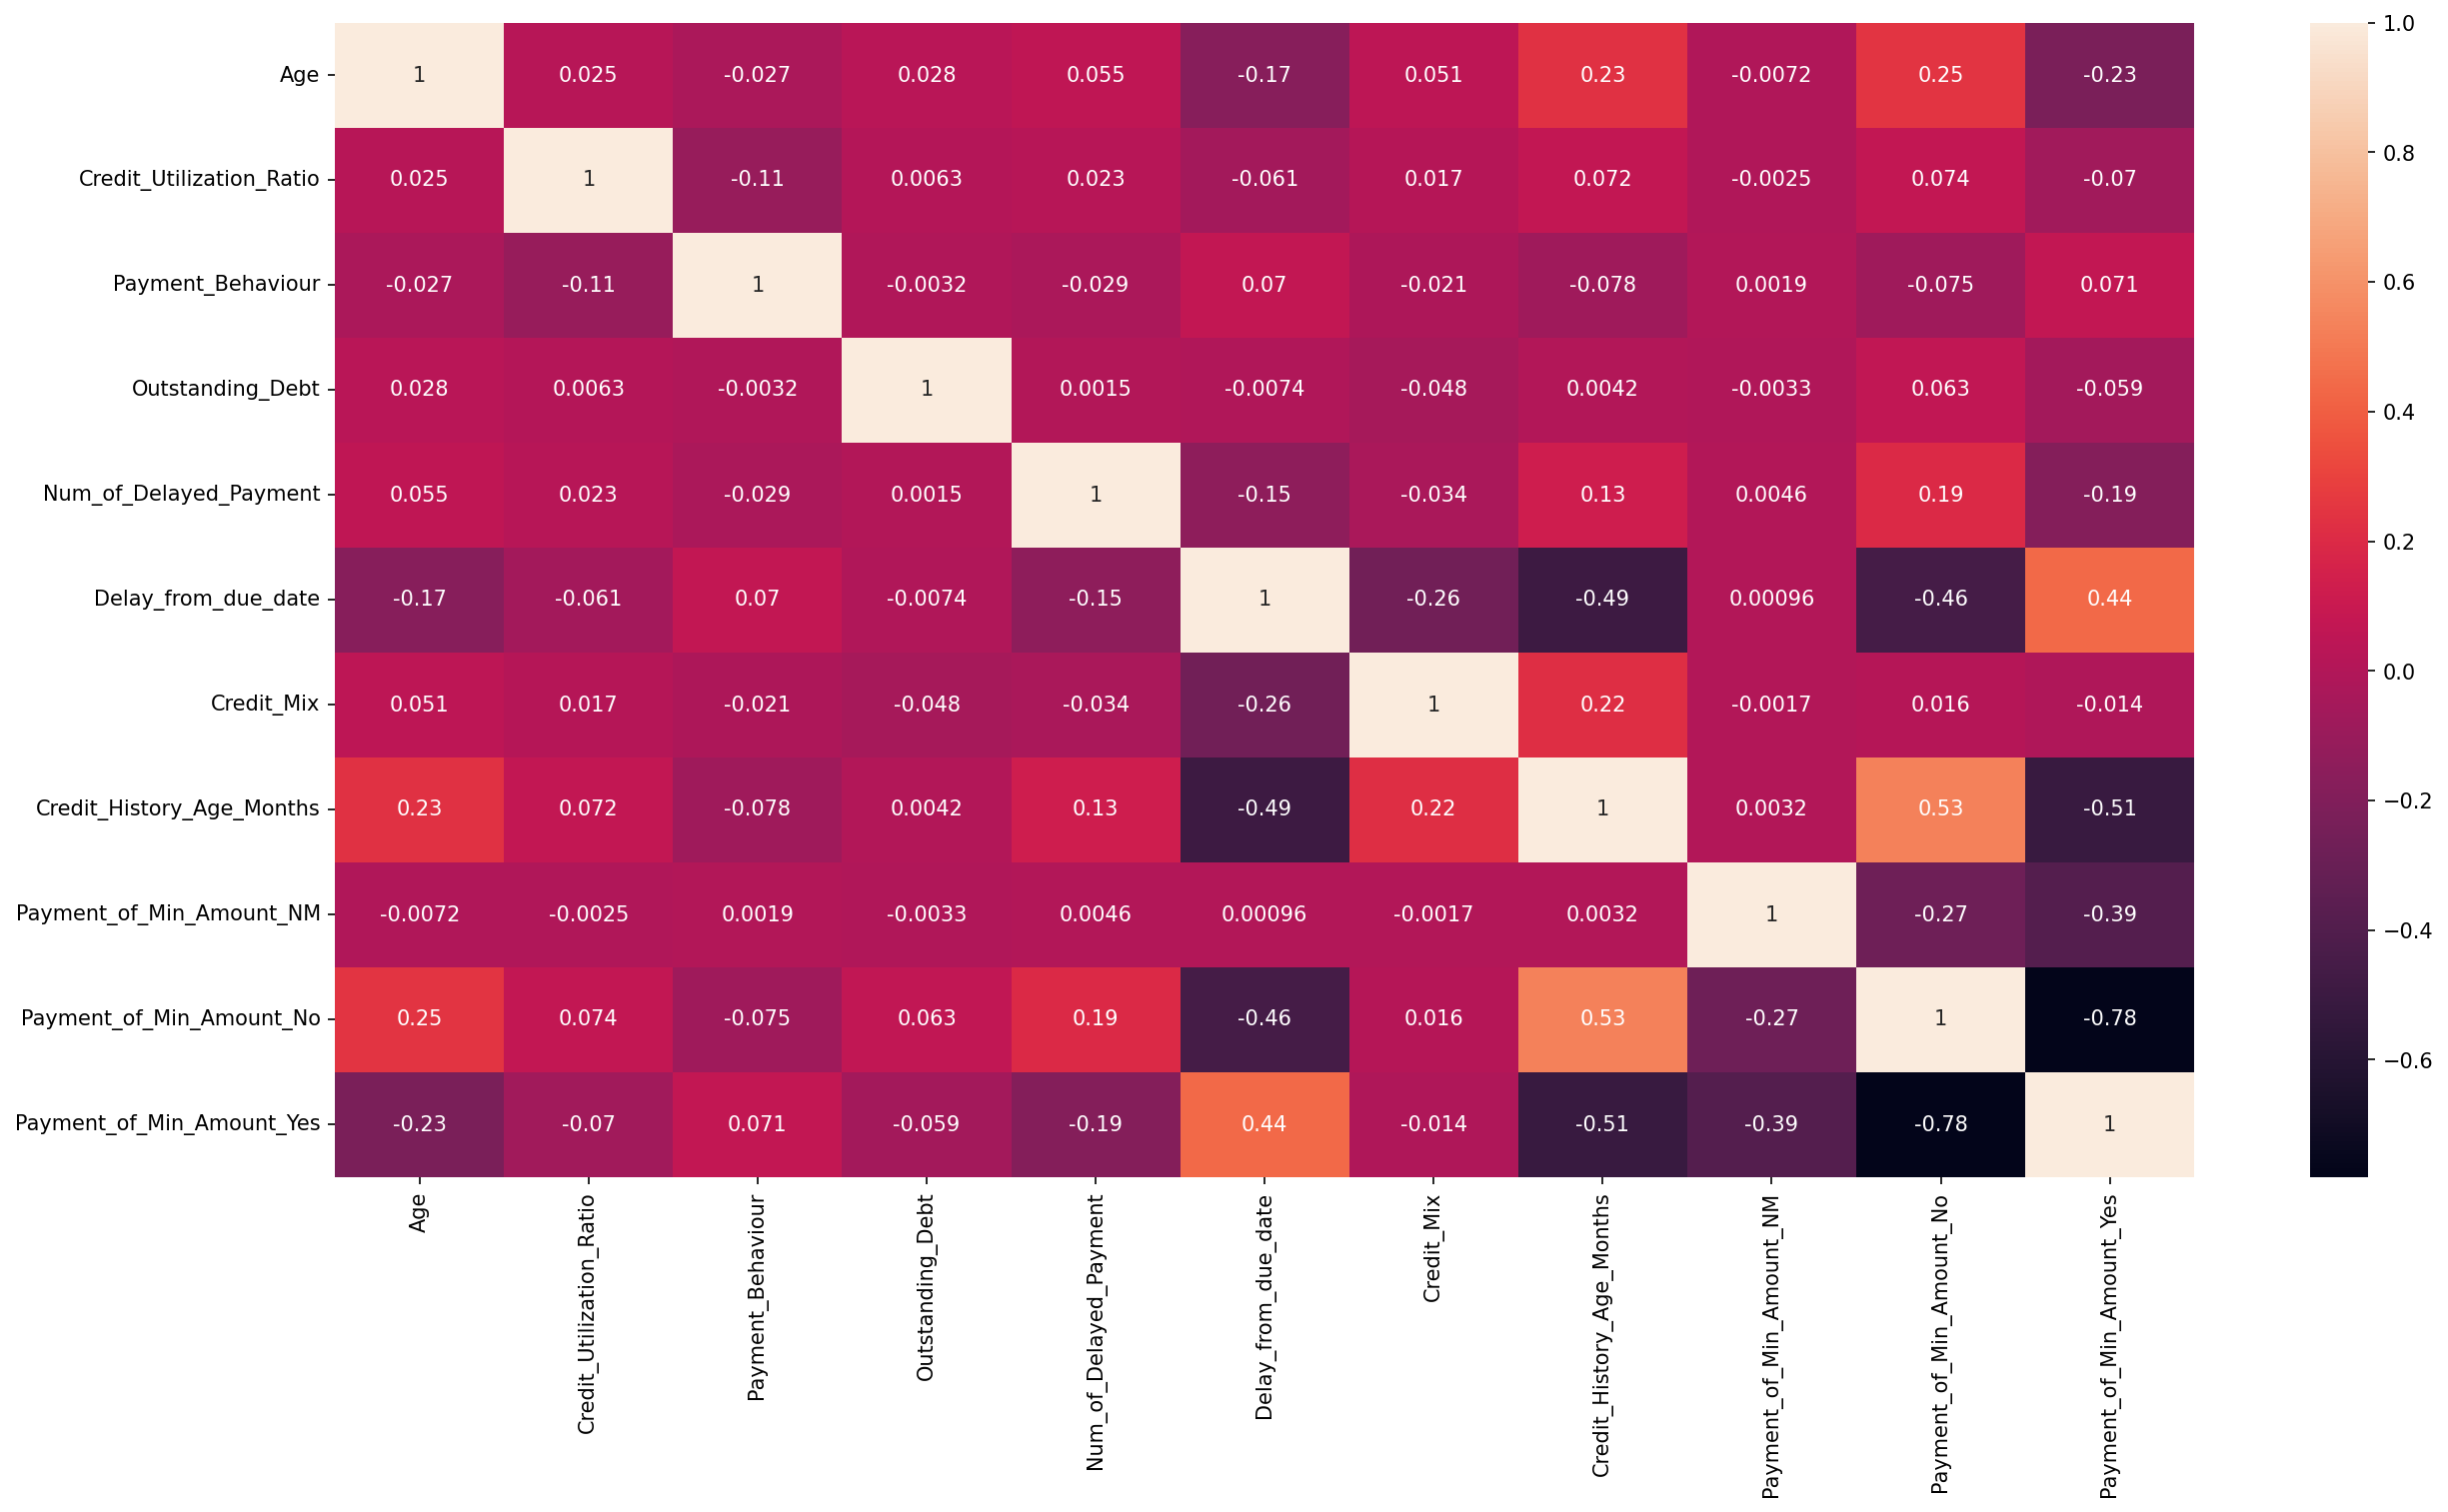

In [1112]:
plt.figure(figsize=(20,10),dpi=150)
sns.heatmap(df_new.corr(numeric_only=True),annot=True)

## Pie chart of credit score

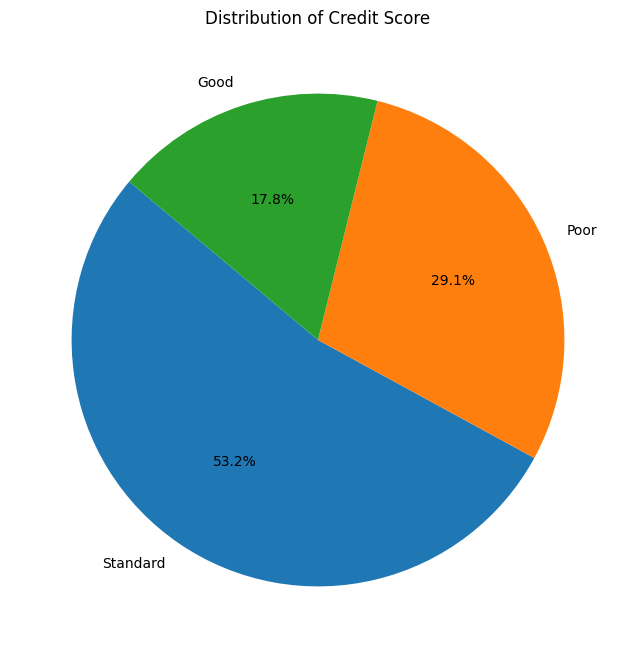

In [1113]:
credit_score_counts = df_new['Credit_Score'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(credit_score_counts, labels=credit_score_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Credit Score')
plt.show()

## final dataset csv of df_new

In [1114]:
df_new.to_csv('df_new.csv', index=False)

In [1115]:
# Assuming df_new is your DataFrame
df_new.to_csv('df_new.csv', index=False)